### Importing Required Libraries and Files

In [162]:
import sqlite3
import pandas as pd
import numpy as np

In [130]:
df_reactions = pd.read_csv('Reactions.csv')
df_content = pd.read_csv('Content.csv')
df_reaction_type = pd.read_csv('ReactionTypes.csv')

### Data Inspection and Data Cleaning

<div style="text-indent: 0.5in">
Reactions Table
</div>

In [131]:
# Display basic information about the dataset
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [132]:
# Display few top rows from the data frame
df_reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [133]:
# Drop the first column which doesn't have name
df_reactions = df_reactions.iloc[:, 1:]

# Since user_id column doesn't help to answer the question that client is looking for, we will drop it
df_reactions = df_reactions.drop('User ID', axis = 1)
df_reactions.head()

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [134]:
# Since other table also have column name type, we will rename column to make it more clear
df_reactions = df_reactions.rename(columns={'Content ID': 'content_id','Type': 'reactions_type','Datetime': 'datetime'})
df_reactions.head()

,content_id,reactions_type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [135]:
# Check for null values in the DataFrame and count null values in each column
print(df_reactions.isnull().sum())

content_id          0
reactions_type    980
datetime            0
dtype: int64


In [136]:

# Use notna() method along with boolean indexing to keep only rows where 'Reaction Type' is not null
df_reactions = df_reactions[df_reactions['reactions_type'].notna()]

In [137]:
# Check for null values in the DataFrame and count null values in each column again after drop
print(df_reactions.isnull().sum())

content_id        0
reactions_type    0
datetime          0
dtype: int64


In [138]:
# Check for duplicate rows in DataFrame
print(df_reactions.duplicated().sum())

0


<div style="text-indent: 0.5in">
Content Table
</div>

In [139]:
# Display basic information about the dataset
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [140]:
# Display few top rows from the data frame
df_content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [141]:
# Drop the first column which doesn't have name
df_content = df_content.iloc[:, 1:]

# Since user_id column doesn't help to answer the question that client is looking for, we will drop it
df_content = df_content.drop(['URL','User ID'], axis = 1)
df_content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [142]:
# Since other table also have column name type, we will rename column to make it more clear
df_content = df_content.rename(columns={'Content ID':'content_id', 'Type':'content_type','Category':'category'})
df_content.head()

,content_id,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [143]:
# Check for null values in the DataFrame and count null values in each column
print(df_content.isnull().sum())

content_id      0
content_type    0
category        0
dtype: int64


In [144]:
# Check for duplicate rows in DataFrame
print(df_content.duplicated().sum())

0


In [145]:
unique_content_type = df_content['content_type'].unique()
unique_content_type

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [146]:
unique_categories = df_content['category'].unique()
unique_categories

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [147]:
df_content['category'] = df_content['category'].str.lower().str.strip('" ')
unique_categories_cleaned = df_content['category'].unique()
unique_categories_cleaned

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

Reation Type Table

In [148]:
# Display basic information about the dataset
df_reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [149]:
# Display few top rows from the data frame
df_reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [ ]:
# Drop the first column which doesn't have name
df_reaction_type = df_reaction_type.iloc[:, 1:]

In [152]:
# Rename column to make it more clear and easier for SQL later
df_reaction_type = df_reaction_type.rename(columns={'Type':'type', 'Sentiment':'sentiment','Score':'score'})
df_reaction_type.head()

,type,sentiment,score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [153]:

# Check for null values in the DataFrame and count null values in each column
print(df_reaction_type.head().isnull().sum())

type         0
sentiment    0
score        0
dtype: int64


In [154]:
# Check for duplicate rows in DataFrame
print(df_reaction_type.duplicated().sum())

0


### Data Visualization

In [155]:
# We'll convert them to SQLite tables
connection = sqlite3.connect(':memory:')  # Create an in-memory database
df_reactions.to_sql('reactions', connection, if_exists='replace', index=False)
df_content.to_sql('content', connection, if_exists='replace', index=False)
df_reaction_type.to_sql('reaction_type', connection, if_exists='replace', index=False)

# SQL query to count the number of unique categories
unique_categories_query = "SELECT COUNT(DISTINCT category) AS unique_categories_count FROM content;"

# Execute the query
unique_categories_count = pd.read_sql_query(unique_categories_query, connection)
unique_categories_count



,unique_categories_count
0,16


In [157]:
# Define the SQL query to find the top 5 categories by popularity
most_popular_category_query = """
SELECT c.category, SUM(rt.score) AS total_score
FROM reactions AS r
JOIN content AS c ON r.content_id = c.content_id
JOIN reaction_type AS rt ON r.reactions_type = rt.type
GROUP BY c.category
ORDER BY total_score DESC
LIMIT 5;
"""

# Execute the query and store the result in a DataFrame
top_categories = pd.read_sql_query(most_popular_category_query, connection)
top_categories

,category,total_score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [166]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


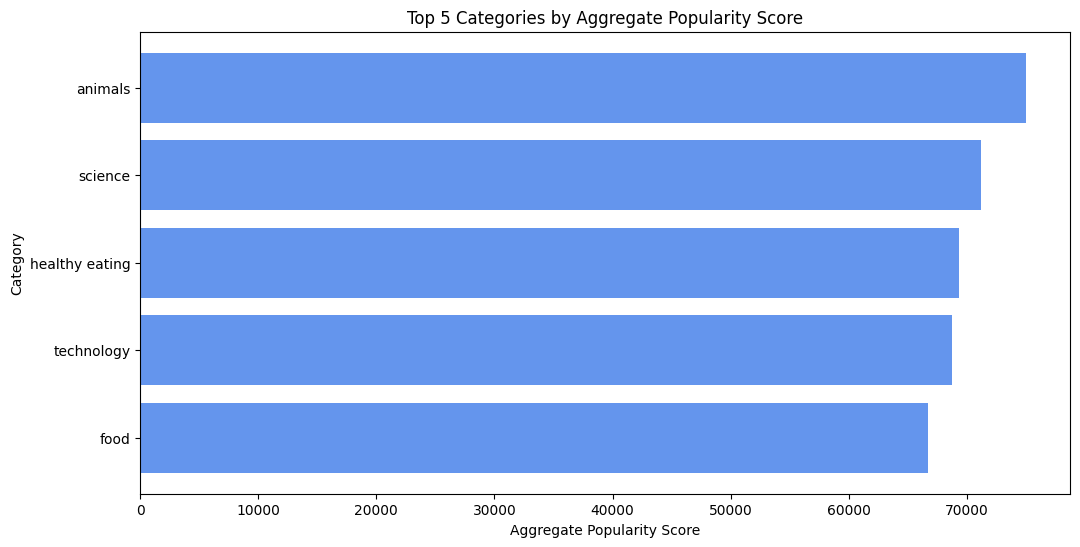

In [173]:
import matplotlib.pyplot as plt

# Extract the category and total_score columns from the DataFrame
categories = top_categories['category']
total_score = top_categories['total_score']

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(categories, total_score, color='cornflowerblue')
plt.xlabel('Aggregate Popularity Score')
plt.ylabel('Category')
plt.title('Top 5 Categories by Aggregate Popularity Score')
plt.gca().invert_yaxis()  # Reverse the order of categories

# Show the plot
plt.show()


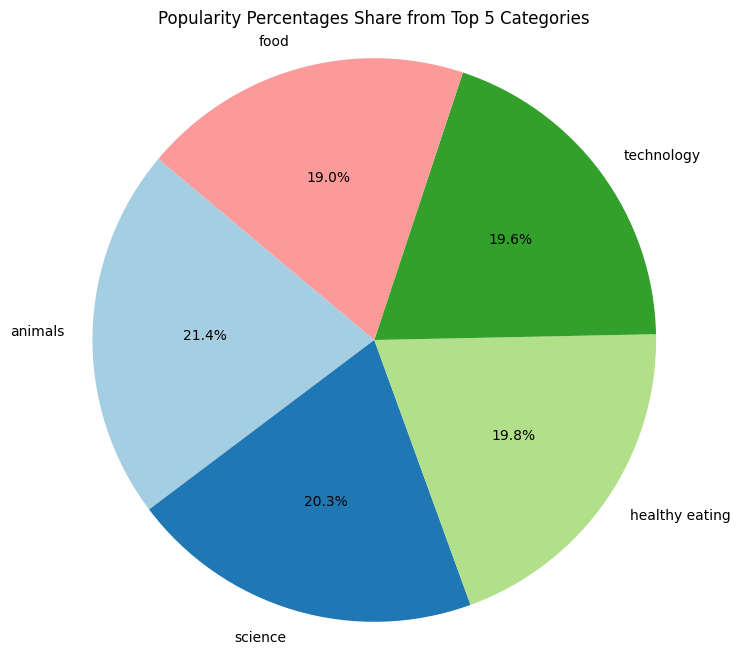

In [183]:
# Calculate the total popularity score
total_popularity = sum(total_score)

# Calculate the percentage for each category
percentages = [round((score / total_popularity) * 100,1) for score in total_score]

# Create a circular pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(categories))))
plt.title('Popularity Percentages Share from Top 5 Categories')

# Show the plot
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

In [186]:

# SQL query to find the month with the most posts
most_posts_month_query = """
SELECT strftime('%Y-%m', r.datetime) AS month, COUNT(*) AS post_count
FROM reactions AS r
JOIN content AS c ON r.content_id = c.content_id
GROUP BY month
ORDER BY post_count DESC
LIMIT 3;
"""

# Execute the query and store the result in a DataFrame
most_posts_month = pd.read_sql_query(most_posts_month_query, connection)
most_posts_month

,month,post_count
0,2021-05,2138
1,2021-01,2126
2,2020-08,2114


In [188]:
# Close the database connections
connection.close()